# IUCN Exploratory Data Analysis

### Acknowledgements
- Borgelt, J., Dorber, M., Høiberg, M.A. _et al._ More than half of data deficient species predicted to be threatened by extinction. _Commun Biol_ **5**, 679 (2022). https://doi.org/10.1038/s42003-022-03638-9, Accessed: February 2026.
- IUCN 2025. IUCN Red List of Threatened Species. Version 2025-2 <www.iucnredlist.org>
- UNEP-WCMC and IUCN (2026), Protected Planet: The World Database on Protected Areas (WDPA) and World Database on Other Effective Area-based Conservation Measures (WD-OECM) [Online], February 2026, Cambridge, UK: UNEP-WCMC and IUCN. Available at: <www.protectedplanet.net.>

### Import resources

In [1]:
# import resources

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot  as plt
import geopandas as gpd
import shapely as sh
import seaborn as sns

## Gather IUCN summary data
- redlist categories
- population status

In [2]:
iucn_summary = pd.read_csv(r"..\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\simple_summary.csv")

iucn_summary.info()

<class 'pandas.DataFrame'>
RangeIndex: 41949 entries, 0 to 41948
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assessmentId     41949 non-null  int64  
 1   internalTaxonId  41949 non-null  int64  
 2   scientificName   41949 non-null  str    
 3   kingdomName      41949 non-null  str    
 4   phylumName       41949 non-null  str    
 5   orderName        41949 non-null  str    
 6   className        41949 non-null  str    
 7   familyName       41949 non-null  str    
 8   genusName        41949 non-null  str    
 9   speciesName      41949 non-null  str    
 10  infraType        1641 non-null   str    
 11  infraName        1641 non-null   str    
 12  infraAuthority   0 non-null      float64
 13  authority        41657 non-null  str    
 14  redlistCategory  41949 non-null  str    
 15  redlistCriteria  13869 non-null  str    
 16  criteriaVersion  41949 non-null  float64
 17  populationTrend  40869 

In [3]:
iucn_summary['redlistCategory'].unique()

<StringArray>
[                  'Near Threatened',                        'Vulnerable',
                        'Endangered',             'Critically Endangered',
                    'Data Deficient',                     'Least Concern',
               'Extinct in the Wild',                           'Extinct',
                'Regionally Extinct',        'Lower Risk/near threatened',
                    'Not Applicable',          'Lower Risk/least concern',
 'Lower Risk/conservation dependent']
Length: 13, dtype: str

In [4]:
iucn_summary['populationTrend'].unique()

<StringArray>
['Decreasing', 'Unknown', 'Stable', 'Increasing', nan]
Length: 5, dtype: str

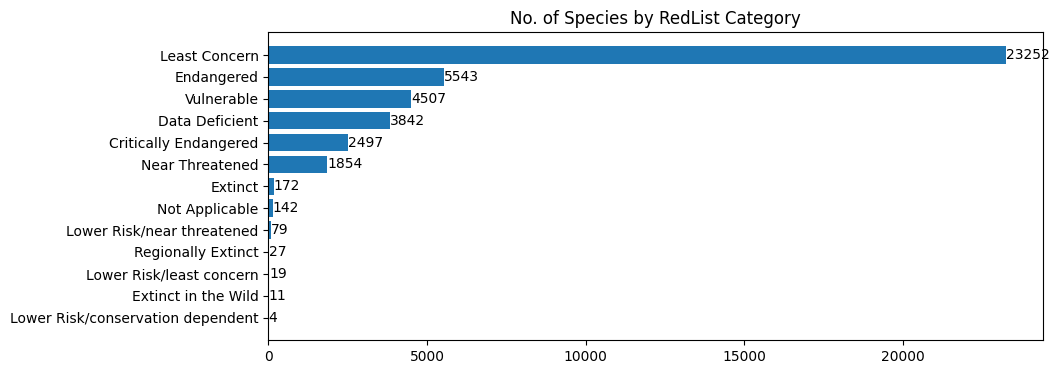

In [54]:
species_by_category = iucn_summary.groupby('redlistCategory')[['speciesName']].count().sort_values(by='speciesName', ascending=True).reset_index()

plt.figure(figsize=(10,4))
plt.barh(species_by_category['redlistCategory'],species_by_category['speciesName'])
for i, v in enumerate(species_by_category['speciesName']):
    plt.text(v + 0.1, i, str(v), va='center')
plt.title('No. of Species by RedList Category')
plt.show()

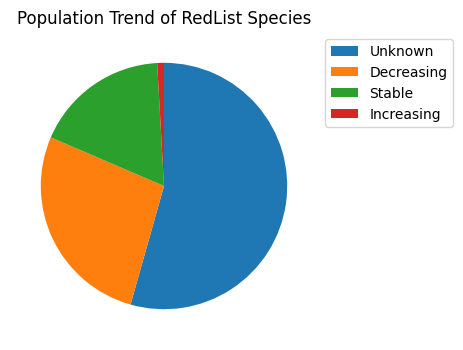

In [47]:
species_by_populationTrend = iucn_summary.groupby('populationTrend')[['speciesName']].count().sort_values(by='speciesName', ascending=False).reset_index()

plt.figure(figsize=(4,4))
plt.title('Population Trend of RedList Species')
plt.pie(species_by_populationTrend['speciesName'],
        startangle=90.0,
        counterclock=False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels = species_by_populationTrend['populationTrend'])
plt.show()

In [7]:
categories_by_populationTrend = iucn_summary.set_index(['redlistCategory', 
                                                'populationTrend']).sort_index()

categories_by_populationTrend.groupby(level=0)['kingdomName'].count()

redlistCategory
Critically Endangered                 2497
Data Deficient                        3842
Endangered                            5543
Extinct                                172
Extinct in the Wild                     11
Least Concern                        23252
Lower Risk/conservation dependent        4
Lower Risk/least concern                19
Lower Risk/near threatened              79
Near Threatened                       1854
Not Applicable                         142
Regionally Extinct                      27
Vulnerable                            4507
Name: kingdomName, dtype: int64

In [ ]:
species_count = categories_by_populationTrend.groupby(level=[0,1]).size()
species_count = species_count.reset_index(name='species_count')
species_count.head()

,redlistCategory,populationTrend,species_count
0,Critically Endangered,Decreasing,1391
1,Critically Endangered,Increasing,10
2,Critically Endangered,Stable,44
3,Critically Endangered,Unknown,969
4,Data Deficient,Decreasing,134


In [9]:
df = pd.read_csv(r'..\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\threats.csv')

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 88999 entries, 0 to 88998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   assessmentId        88999 non-null  int64
 1   internalTaxonId     88999 non-null  int64
 2   scientificName      88999 non-null  str  
 3   code                88999 non-null  str  
 4   name                88999 non-null  str  
 5   stressCode          78876 non-null  str  
 6   stressName          78876 non-null  str  
 7   ancestry            302 non-null    str  
 8   ias                 3304 non-null   str  
 9   internationalTrade  2561 non-null   str  
 10  scope               43763 non-null  str  
 11  severity            43515 non-null  str  
 12  text                314 non-null    str  
 13  timing              88898 non-null  str  
 14  virus               53 non-null     str  
dtypes: int64(2), str(13)
memory usage: 10.2 MB


In [10]:
df.head()

,assessmentId,internalTaxonId,scientificName,code,name,stressCode,stressName,ancestry,ias,internationalTrade,scope,severity,text,timing,virus
0,2559973,199109,Gavialiceps taeniola,5.4.1,Intentional use: (subsistence/small scale) [ha...,2.1,Species mortality,NaN,NaN,Yes,Unknown,Unknown,NaN,Ongoing,NaN
1,2559973,199109,Gavialiceps taeniola,5.4.2,Intentional use: (large scale) [harvest],2.1,Species mortality,NaN,NaN,Yes,Unknown,Unknown,NaN,Ongoing,NaN
2,2566501,199173,Dysomma dolichosomatum,5.4.4,Unintentional effects: (large scale) [harvest],2.1,Species mortality,NaN,NaN,NaN,Unknown,Unknown,NaN,Ongoing,NaN
3,2569616,199204,Muraenichthys schultzei,5.4.1,Intentional use: (subsistence/small scale) [ha...,2.1,Species mortality,NaN,NaN,NaN,Unknown,Unknown,NaN,Ongoing,NaN
4,2569616,199204,Muraenichthys schultzei,5.4.3,Unintentional effects: (subsistence/small scal...,2.1,Species mortality,NaN,NaN,NaN,Unknown,Unknown,NaN,Ongoing,NaN


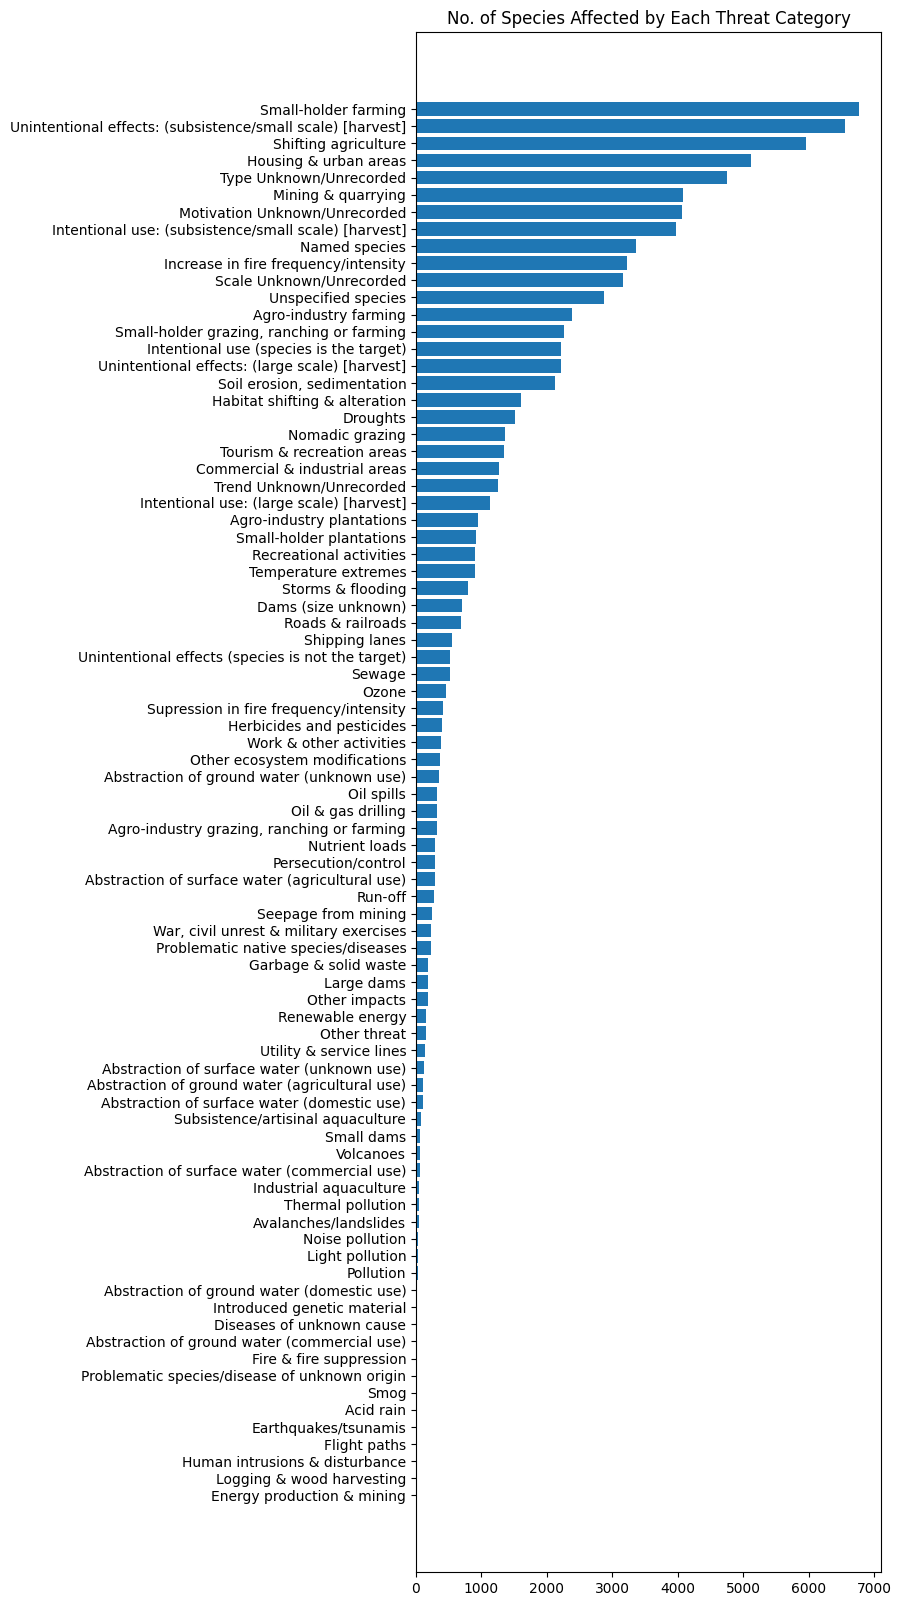

In [11]:
threats_by_category = df.groupby('name')[['scientificName']].count().sort_values(by='scientificName', ascending=True).reset_index()
plt.figure(figsize=(6,20))
plt.barh(threats_by_category['name'], threats_by_category['scientificName'])
plt.title('No. of Species Affected by Each Threat Category')
plt.show()

## Gather data relevant to Kenya's species focus
Five species action plans were completed in 2024 and 2025 as follows:
1. 2nd edition of the Recovery and Action Plan for the Sable Antelope (Hippotragus niger) in Kenya (2024-2033), launched during the World Wildlife Day on 3rd March 2024 in Shimba Hills NR, Kwale;
2. Vultures Multi-Species Action Plan for Kenya 2024-2034, virtual launched on 6th September 2024;
3. National Recovery and Action Plan for the Pangolins in Kenya (2024-2028), virtual launch with panelists on 8th October 2024;
4. National Single Species Action Plan for the Conservation of the Grey Crowned Crane (Balearica regulorum gibbericeps) in Kenya (2025 - 2034), launched during the World Wildlife Day on 3rd March 2025 in Baringo, and 
5. National Recovery and Conservation Action Plan for the Pancake Tortoise (Malacochersus tornieri) in Kenya (2025-2035), launched during the World Endangered Species Day celebrations on 16th May 2025, in Ciakariga, Tharaka

### Species in focus:
- Sable Antelope (Hippotragus niger)
- Vultures
- Pangolins
- Grey Crowned Crane (Balearica regulorum gibbericeps)
- Pancake Tortoise (Malacochersus tornieri)

### countries

In [12]:
species_by_country = pd.read_csv(r"..\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\countries.csv")

species_by_country.info()

<class 'pandas.DataFrame'>
RangeIndex: 431396 entries, 0 to 431395
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   assessmentId     431396 non-null  int64
 1   internalTaxonId  431396 non-null  int64
 2   scientificName   431396 non-null  str  
 3   code             427182 non-null  str  
 4   name             431396 non-null  str  
 5   presence         431396 non-null  str  
 6   origin           431396 non-null  str  
 7   seasonality      369694 non-null  str  
 8   formerlyBred     93189 non-null   str  
dtypes: int64(2), str(7)
memory usage: 29.6 MB


In [13]:
species_by_country.head()

,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred
0,2554448,199057,Ilyophis blachei,IE,Ireland,Extant,Native,"[""Resident""]",Unknown
1,2554448,199057,Ilyophis blachei,GB,United Kingdom,Extant,Native,"[""Resident""]",Unknown
2,2554448,199057,Ilyophis blachei,AU,Australia,Extant,Native,"[""Resident""]",Unknown
3,2554448,199057,Ilyophis blachei,NZ,New Zealand,Extant,Native,"[""Resident""]",Unknown
4,2554448,199057,Ilyophis blachei,ID,Indonesia,Extant,Native,"[""Resident""]",Unknown


In [14]:
ke_species = species_by_country[species_by_country['name'] == 'Kenya']

ke_species.head()

,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred
46,2556736,199080,Myrichthys colubrinus,KE,Kenya,Extant,Native,"[""Resident""]",NaN
273,2574231,199246,Callechelys catostoma,KE,Kenya,Extant,Native,"[""Resident""]",NaN
332,2575605,199258,Ophichthus apicalis,KE,Kenya,Extant,Native,"[""Resident""]",NaN
554,2584816,199340,Callechelys marmorata,KE,Kenya,Extant,Native,"[""Resident""]",NaN
580,2585044,199341,Muraenesox bagio,KE,Kenya,Extant,Native,"[""Resident""]",Unknown


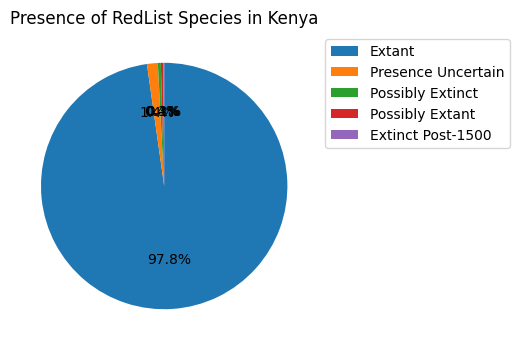

In [ ]:
ke_species_by_presence = ke_species.groupby('presence')[['scientificName']].count().sort_values(by='scientificName', ascending=False).reset_index()
plt.figure(figsize=(6,4))
plt.title('Presence of RedList Species in Kenya')
plt.pie(ke_species_by_presence['scientificName'],
        startangle=90.0,
        counterclock=False, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=ke_species_by_presence['presence'],)
plt.show()

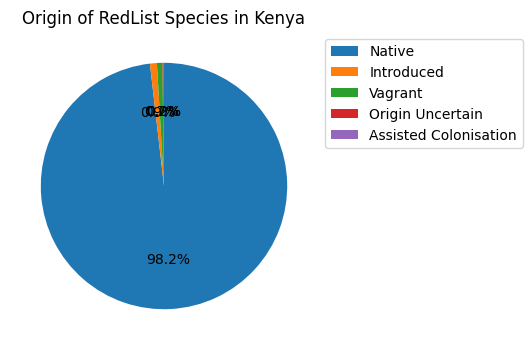

In [ ]:
ke_species_by_origin = ke_species.groupby('origin')[['scientificName']].count().sort_values(by='scientificName', ascending=False).reset_index()
plt.figure(figsize=(6,4))
plt.title('Origin of RedList Species in Kenya')
plt.pie(ke_species_by_origin['scientificName'],
        startangle=90.0,
        counterclock=False, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=ke_species_by_origin['origin'],)
plt.show()

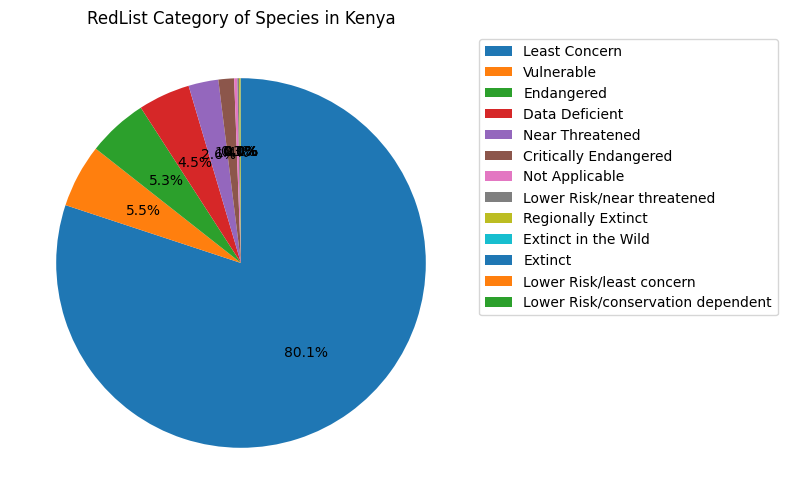

In [ ]:
ke_species_with_category = pd.merge(ke_species, iucn_summary[['assessmentId', 'redlistCategory']], on='assessmentId', how='left')
ke_species_by_category = ke_species_with_category.groupby('redlistCategory')[['scientificName']].count().sort_values(by='scientificName', ascending=False).reset_index()
plt.figure(figsize=(6,6))
plt.title('RedList Category of Species in Kenya')
plt.pie(ke_species_by_category['scientificName'],
        startangle=90.0,
        counterclock=False, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=ke_species_by_category['redlistCategory'],)
plt.show()

## Kenya - Data Deficient Species

In [ ]:
# Merge Kenya species with the IUCN summary to get redlistCategory, then filter for Data Deficient species

ke_data_deficient = pd.merge(
    ke_species,
    iucn_summary[['assessmentId', 'redlistCategory']],
    on='assessmentId',
    how='left'
)

ke_data_deficient = ke_data_deficient[ke_data_deficient['redlistCategory'] == 'Data Deficient']

print(f'Number of Data Deficient species in Kenya: {len(ke_data_deficient)}')
ke_data_deficient

Number of Data Deficient species in Kenya: 375


,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred,redlistCategory
85,103708488,103707683,Saurenchelys elongata,KE,Kenya,Extant,Native,"[""Resident""]",Unknown,Data Deficient
101,169783463,169783460,Charaxes blanda,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
118,223070642,32641,Moringa arborea,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
186,128045795,128045762,Moringa stenopetala,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
187,183101379,183094679,Cordia fischeri,KE,Kenya,Presence Uncertain,Origin Uncertain,NaN,NaN,Data Deficient
...,...,...,...,...,...,...,...,...,...,...
8041,241152145,241152142,Callogobius irrasus,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
8047,259072345,205895889,Chlorocebus pygerythrus ssp. zavattarii,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
8126,263072010,285107889,Polysteganus coeruleopunctatus,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient
8142,266582960,266582461,Streptocephalus vitreus,KE,Kenya,Extant,Native,"[""Resident""]",NaN,Data Deficient


# research needed

In [16]:
species_by_research_needed = pd.read_csv(r"..\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\research_needed.csv")

species_by_research_needed.info()

<class 'pandas.DataFrame'>
RangeIndex: 82263 entries, 0 to 82262
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assessmentId     82263 non-null  int64  
 1   internalTaxonId  82263 non-null  int64  
 2   scientificName   82263 non-null  str    
 3   code             82263 non-null  float64
 4   name             82263 non-null  str    
 5   note             3305 non-null   str    
dtypes: float64(1), int64(2), str(3)
memory usage: 3.8 MB


In [17]:
species_by_research_needed['name'].unique()

<StringArray>
[                'Life history & ecology',
                               'Taxonomy',
 'Population size, distribution & trends',
                                'Threats',
             'Harvest, use & livelihoods',
                         'Habitat trends',
                                'Actions',
                      'Population trends',
                   'Harvest level trends',
                           'Trade trends',
           'Species Action/Recovery Plan',
             'Area-based Management Plan',
                                  'Other',
        'Harvest & Trade Management Plan',
                               'Research',
                  'Conservation Planning',
                             'Monitoring']
Length: 17, dtype: str

In [43]:
research_needed_by_category = pd.merge(categories_by_populationTrend.reset_index(),
                                       species_by_research_needed,
                                       on='scientificName',
                                    how='left')
research_needed_by_category.head()
research_needed_by_category = research_needed_by_category.groupby(['redlistCategory', 'name'])[['scientificName']].count().sort_values(by='scientificName', ascending=False).reset_index()
research_needed_by_category.head()

,redlistCategory,name,scientificName
0,Least Concern,"Population size, distribution & trends",11125
1,Least Concern,Population trends,9013
2,Least Concern,Life history & ecology,8205
3,Least Concern,Threats,7336
4,Endangered,"Population size, distribution & trends",3782


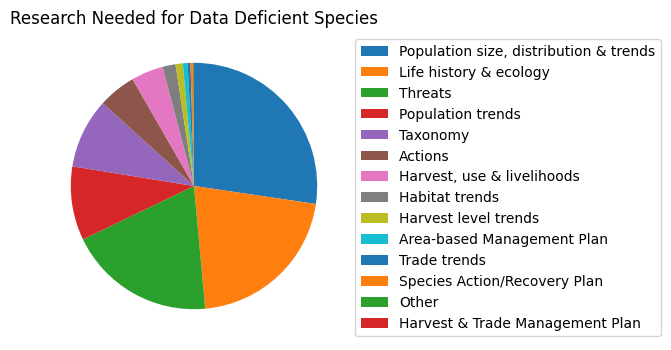

In [44]:
data_deficient_research_needed = research_needed_by_category[research_needed_by_category['redlistCategory'] == 'Data Deficient']
plt.figure(figsize=(10,4))
plt.title('Research Needed for Data Deficient Species')
plt.pie(data_deficient_research_needed['scientificName'],
        startangle=90.0,
        counterclock=False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels = data_deficient_research_needed['name'])
plt.show()

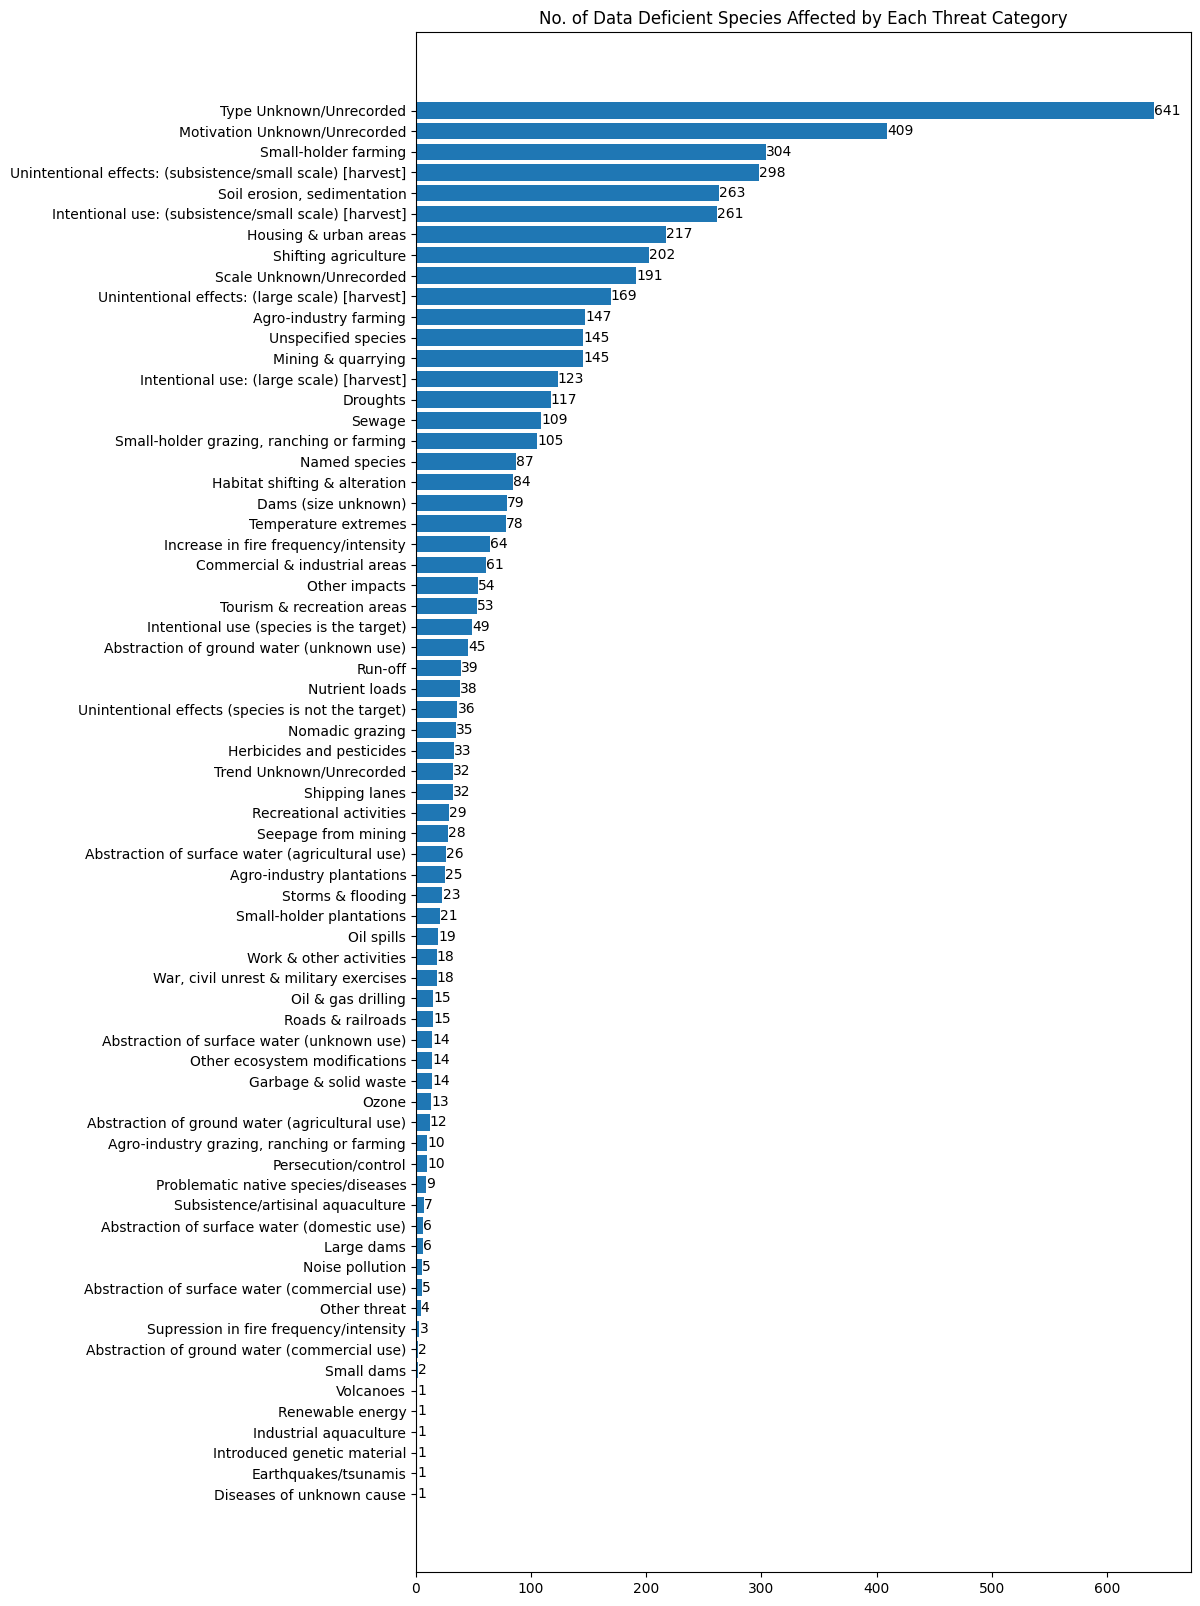

In [ ]:
data_deficient_species = iucn_summary[iucn_summary['redlistCategory'] == 'Data Deficient']['scientificName']
threats_for_data_deficient = df[df['scientificName'].isin(data_deficient_species)]
threats_by_category_for_data_deficient = threats_for_data_deficient.groupby('name')[['scientificName']].count().sort_values(by='scientificName', ascending=True).reset_index()
plt.figure(figsize=(10,20))
plt.barh(threats_by_category_for_data_deficient['name'], threats_by_category_for_data_deficient['scientificName'])
for i, v in enumerate(threats_by_category_for_data_deficient['scientificName']):
    plt.text(v + 0.1, i, str(v), va='center')
plt.title('No. of Data Deficient Species Affected by Each Threat Category')
plt.show()

# Plants

In [21]:
plants1 = gpd.read_file(r"..\data\raw\iucn\PLANTS\PLANTS_PART1.shp")

In [22]:
plants1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_no       5279 non-null   int64   
 1   sci_name    5279 non-null   str     
 2   presence    5279 non-null   int32   
 3   origin      5279 non-null   int32   
 4   seasonal    5279 non-null   int32   
 5   compiler    5187 non-null   str     
 6   yrcompiled  5279 non-null   int32   
 7   citation    5279 non-null   str     
 8   subspecies  40 non-null     str     
 9   subpop      37 non-null     str     
 10  source      2279 non-null   str     
 11  island      1104 non-null   str     
 12  tax_comm    0 non-null      object  
 13  dist_comm   90 non-null     str     
 14  generalisd  5279 non-null   int32   
 15  legend      5279 non-null   str     
 16  kingdom     5279 non-null   str     
 17  phylum      5279 non-null   str     
 18  class       5279 non-null   str     
 19

In [23]:
plants2 = gpd.read_file(r"..\data\raw\iucn\PLANTS\PLANTS_PART2.shp")

In [24]:
plants3 = gpd.read_file(r"..\data\raw\iucn\PLANTS\PLANTS_PART3.shp")